# Plot estimated and observed clade frequencies

Plot the overall observed clade frequencies compared to the estimated frequencies at each timepoint. The differences between these frequencies tells us something about the error in frequency estimation due to missing data from the near future.

In [86]:
from collections import defaultdict
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.style.use("huddlej")

In [87]:
!pwd

/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses


In [88]:
with open("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/timepoints/2012-10-01/segments/ha/frequencies.json", "r") as fh:
    frequencies = json.load(fh)

In [89]:
with open("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/timepoints/2012-10-01/segments/ha/clades.json", "r") as fh:
    clades = json.load(fh)

In [90]:
tips = pd.read_csv("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/standardized_tip_attributes.tsv",
                   sep="\t", parse_dates=["timepoint"])
tips = tips.loc[
    tips["segment"] == "ha",
    ["strain", "clade_membership", "timepoint", "frequency"]
].copy()

In [91]:
data_path = "../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/tips_to_clades.tsv"

In [92]:
df = pd.read_csv(data_path, sep="\t", parse_dates=["timepoint"])

In [121]:
# successful clade
clade_name = "d4aa5d5"

# unsuccessful clade
clade_name = "5f0cf16"

In [122]:
clade_tips = df[df["clade_membership"] == clade_name]["tip"].unique()

In [123]:
clade_tips.shape

(20,)

In [124]:
df["tip"].unique().shape

(1034,)

In [125]:
clade_tips.shape

(20,)

In [126]:
estimated_clade_frequencies = tips[tips["strain"].isin(clade_tips)].groupby("timepoint")["frequency"].sum().reset_index()

In [127]:
estimated_clade_frequencies["timepoint_float"] = estimated_clade_frequencies["timepoint"].dt.year + (estimated_clade_frequencies["timepoint"].dt.month - 1) / 12.0

In [128]:
estimated_clade_frequencies

,timepoint,frequency,timepoint_float
0,2010-10-01,0.102958,2010.75
1,2011-04-01,0.029985,2011.25
2,2011-10-01,0.073264,2011.75
3,2012-04-01,0.035014,2012.25
4,2012-10-01,0.052350,2012.75


In [129]:
clade_frequencies = np.zeros_like(frequencies["data"]["pivots"])

In [130]:
for tip in clade_tips:
    clade_frequencies += frequencies["data"]["frequencies"][tip]

In [131]:
clade_frequencies

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.008568, 0.097887, 0.028285,
       0.076668, 0.038601, 0.05235 ])

Text(0,0.5,'Frequency')

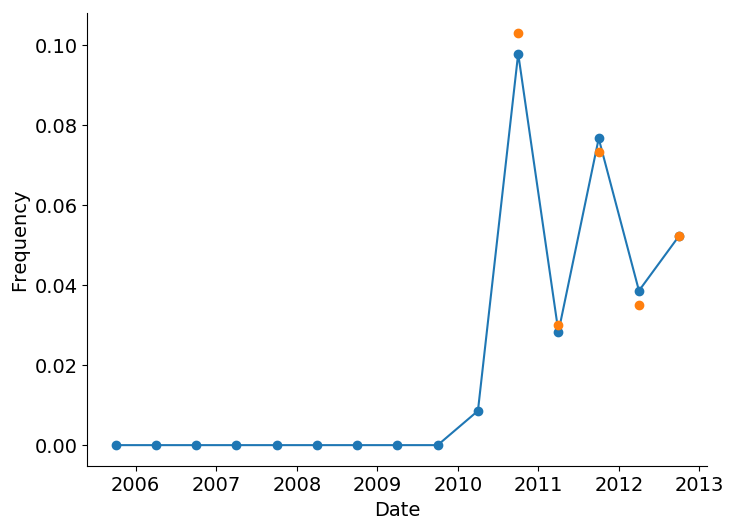

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(frequencies["data"]["pivots"], clade_frequencies, "o-")
ax.plot(estimated_clade_frequencies["timepoint_float"], estimated_clade_frequencies["frequency"], "o")
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
#ax.set_ylim(0, 1)

In [133]:
tips[tips["strain"].isin(clade_tips)]

,strain,clade_membership,timepoint,frequency
243,A/Bolivia/1053/2010,23082c4,2010-10-01,0.005613
250,A/Brisbane/31/2010,23082c4,2010-10-01,0.000610
280,A/Italy/540/2010,23082c4,2010-10-01,0.023435
281,A/Johannesburg/56/2010,23082c4,2010-10-01,0.025655
282,A/Kenya/1711/2010,23082c4,2010-10-01,0.024319
283,A/Kenya/95/2010,23082c4,2010-10-01,0.019341
307,A/Peru/PER308/2010,23082c4,2010-10-01,0.003985
353,A/Bolivia/1053/2010,5f0cf16,2011-04-01,0.000241
358,A/Brisbane/31/2010,5f0cf16,2011-04-01,0.000001
392,A/Johannesburg/56/2010,5f0cf16,2011-04-01,0.000048


In [106]:
found_clade_tips = tips[tips["strain"].isin(clade_tips)]["strain"].unique()

In [107]:
set(clade_tips) - set(found_clade_tips)

set()

In [108]:
tips[tips["strain"] == "A/Kenya/230/2012"]

,strain,clade_membership,timepoint,frequency
811,A/Kenya/230/2012,5f0cf16,2012-10-01,0.019218
